In [9]:
import numpy as np

In [10]:
x_data = np.array([1, 2, 3, 4, 5]).reshape(5,1)
t_data = np.array([2, 3, 4, 5, 6]).reshape(5,1) 
# raw_data = [ [1, 2], [2, 3], [3, 4], [4, 5], [5, 6] ]

print("x_data.shape = ", x_data.shape, ", t_data.shape = ", t_data.shape)

W = np.random.rand(1,1)  
b = np.random.rand(1)  
print("W = ", W, ", W.shape = ", W.shape, ", b = ", b, ", b.shape = ", b.shape)

x_data.shape =  (5, 1) , t_data.shape =  (5, 1)
W =  [[0.92087776]] , W.shape =  (1, 1) , b =  [0.24857591] , b.shape =  (1,)


In [11]:
def errFunc(x, t):     # E(W, b)
    y = np.dot(x,W) + b
    return np.sum((t - y)**2) / len(x)
    
def errValue(x, t):      # 정답과 계산값과의 차이 --> 손실값(error value)
    return errFunc(x, t)

def numerical_derivative(e, x):     # 함수 e의 x에 대한 수치미분 --> E(W,b)를 W=[ ... ] 또는 b로 미분함.
    delta_x = 1e-4  # 0.0001        # 실제 미분함수를 구하지 않고 특정 값의 +- 0.0001 범위에서 기울기 구함
    grad = np.zeros_like(x)         # 주어진 각 값들에 대한 기울기 값 저장

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])  # 다차원 배열 원소들의 순서참조 지원 함수
    while not it.finished:
        idx = it.multi_index        
        temp = x[idx]            # 주어진값(기울기 대상지점값)을 저장해두고 기울기 계산 후 다시 원상태로 되돌림
        x[idx] = temp + delta_x
        fx1 = e(x)                  # e(x+delta_x)   # 주어진 값의 약간의 증가분(+0.0001)에 대한 손실함수 값
        
        x[idx] = temp - delta_x 
        fx2 = e(x)                   # e(x-delta_x)   # 주어진 값의 약간의 감소분(-0.0001)에 대한 손실함수 값
        grad[idx] = (fx1 - fx2) / (2*delta_x)    # 주어진 값은 미세한 구간에서의 손실함수값의 변화량 --> 기울기
        
        x[idx] = temp            # 기울기값 구하기에 사용된 주어진 값의 사용이 끝난뒤 원래 값으로 되돌린다.
        it.iternext() 
    return grad

def grad_descent(x_data, t_data, W, b, learning_rate, repeat, outStep):
    f = lambda x : errFunc(x_data,t_data)   # errFunc()함수를 다른 함수의 인자로 넘기기 위해 

    print("Initial error value = {:.3f}".format(errValue(x_data, t_data)))
    print("Initial W = ", W.reshape(1,-1).round(3))
    print("Initial b = ", b.round(3))
    for step in range(repeat+1):        # 적당한 횟수만큼 경사하강 반복
        W -= learning_rate * numerical_derivative(f, W)
        b -= learning_rate * numerical_derivative(f, b)
        
        if (step % outStep == 0):       # 경사하강 반복 중간마다 손실값 출력
            print("Step = {:<5d}".format(step), "Error Value = {:.4f}".format(errValue(x_data, t_data)),
                  "W =", W.reshape(1,-1).round(3), " b = ", b.round(3))

# 학습을 마친 후, 임의의 데이터에 대해 미래 값 예측 함수
def predict(x):         # 입력변수 x : numpy type
    y = np.dot(x,W) + b
    return y

In [12]:
learning_rate = 1e-3 # 발산하는 경우, 1e-3 ~ 1e-6 등으로 바꾸어서 실행
repeat = 2000
outStep = 100
grad_descent(x_data, t_data, W, b, learning_rate, repeat, outStep)

Initial error value = 0.990
Initial W =  [[0.921]]
Initial b =  [0.249]
Step = 0     Error Value = 0.9478 W = [[0.927]]  b =  [0.251]
Step = 100   Error Value = 0.0856 W = [[1.158]]  b =  [0.337]
Step = 200   Error Value = 0.0733 W = [[1.174]]  b =  [0.365]
Step = 300   Error Value = 0.0684 W = [[1.17]]  b =  [0.387]
Step = 400   Error Value = 0.0640 W = [[1.164]]  b =  [0.407]
Step = 500   Error Value = 0.0598 W = [[1.159]]  b =  [0.427]
Step = 600   Error Value = 0.0559 W = [[1.153]]  b =  [0.446]
Step = 700   Error Value = 0.0522 W = [[1.148]]  b =  [0.464]
Step = 800   Error Value = 0.0488 W = [[1.143]]  b =  [0.482]
Step = 900   Error Value = 0.0456 W = [[1.139]]  b =  [0.5]
Step = 1000  Error Value = 0.0426 W = [[1.134]]  b =  [0.516]
Step = 1100  Error Value = 0.0398 W = [[1.13]]  b =  [0.532]
Step = 1200  Error Value = 0.0372 W = [[1.125]]  b =  [0.548]
Step = 1300  Error Value = 0.0348 W = [[1.121]]  b =  [0.563]
Step = 1400  Error Value = 0.0325 W = [[1.117]]  b =  [0.577]
St

In [13]:
predict(27)

array([[30.2339197]])

## nditer 실습

In [14]:
# nditer 실습
x = np.array([[10, 20, 30, 40],
              [50, 60, 70, 80],
              [85, 86, 87, 88]])
it = np.nditer(x,flags=['multi_index'])

for v in it:
    print(v, end=' ')
print()

print(it.finished)
it.reset()
print(it.finished)

while not it.finished:
    # print(it.iterindex, it.value)
    print(it.multi_index, it.value)
    it.iternext()

10 20 30 40 50 60 70 80 85 86 87 88 
True
False
(0, 0) 10
(0, 1) 20
(0, 2) 30
(0, 3) 40
(1, 0) 50
(1, 1) 60
(1, 2) 70
(1, 3) 80
(2, 0) 85
(2, 1) 86
(2, 2) 87
(2, 3) 88


## 함수미분과 수치미분 비교
$f(x)=x^3-2x^2+3x$  
$f'(x) = 3x^2-4x+3$  
$f'(2) = 7$

x = 1.5일 때의 기울기 :
  수치미분 결과 [3.75000001]
  미분함수 결과 3.75


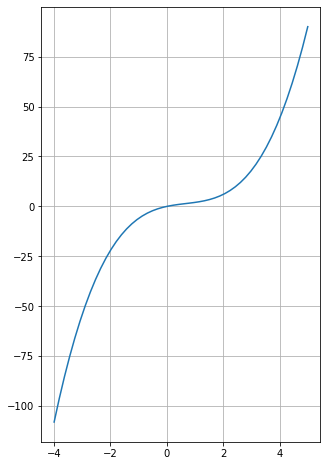

In [15]:
import matplotlib.pyplot as plt
x = np.linspace(-4, 5, 50
                )
def f(x):
    return x**3-2*x**2+3*x

def f_prime(x) :
    return 3*x**2-4*x+3

plt.figure(figsize=(5,8))
plt.plot(x, f(x))
plt.grid(True)

x=1.5
print("x = {}일 때의 기울기 :".format(x))
print("  수치미분 결과", numerical_derivative(f, np.array([x])))
print("  미분함수 결과", f_prime(x))

## 손실함수 $E(W,b) $와 $W, b$의 관계

- $ E(W,b) =  \frac{1}{n} \sum (t_i - (Wx_i+b)$

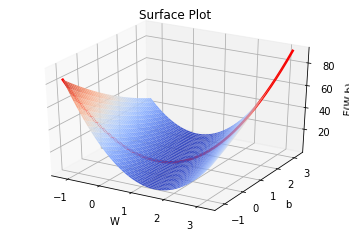

In [16]:
from mpl_toolkits.mplot3d import Axes3D

def e(W, b, x, t):     # x date와 t 레이블이 주어질 때의 손실 함수
    sum = 0
    for i in range(len(x)):
        sum += (t[i]-(W*x[i]+b))**2
    return sum/len(x)

x1 = [1, 2, 3, 4, 5]
t1 = [2, 3, 4, 4, 6]

W = np.arange(-1.2, 3.3, 0.1)
b = np.arange(-1.2, 3.3, 0.1)
Wm, bm = np.meshgrid(W, b)
Z = e(Wm, bm, x1, t1)

fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot_surface(Wm, bm, Z, cmap=plt.cm.coolwarm, linewidth=0.5)
ax.plot(W,b,e(W,b,x1,t1),color='red', linewidth=2.5)
# ax.view_init(40, -110)
plt.xlabel('W')
plt.ylabel('b')
ax.set_zlabel('E(W,b)')
plt.title("Surface Plot")
plt.show()